# Assignment 3 (Lesson 11)

In [151]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

import os
import numpy
from scipy import integrate, linalg

## Part 1: Williams' test case

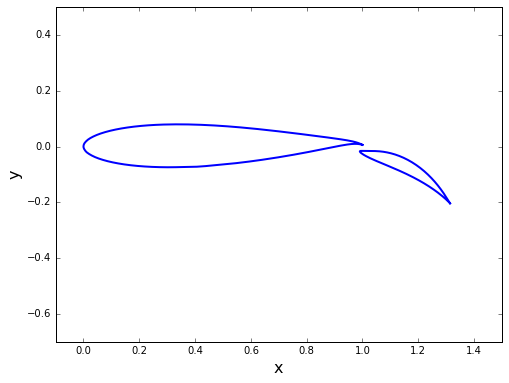

In [152]:
# picking up some x and y values
mainfoilpath = os.path.join('resources','MainFoil_N=200.csv')
with open (mainfoilpath, 'r') as file_name:
    xmain, ymain = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)

flapfoilpath = os.path.join('resources','FlapFoil_N=200.csv')
with open (flapfoilpath, 'r') as file_name:
    xflap, yflap = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)
    
# picking my friends for the trip
xa, xz, ya, yz = -0.1, 1.5, -0.7, 0.5
    
# plot the geometry
size = 8
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(xmain, ymain, xflap, yflap, color='b', linestyle='-', linewidth='2')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz);


# congrats, me, it plotted right! 

In [153]:
# define freestream conditions
u_inf = 1.0
alpha = 0.0
freestream = Freestream(u_inf, alpha)

len(xflap)

201

In [154]:
mainpanels = define_panels(xmain,ymain,100)

start


In [155]:
flappanels = define_panels(xflap,yflap,100)

start


IndexError: index 202 is out of bounds for axis 0 with size 202

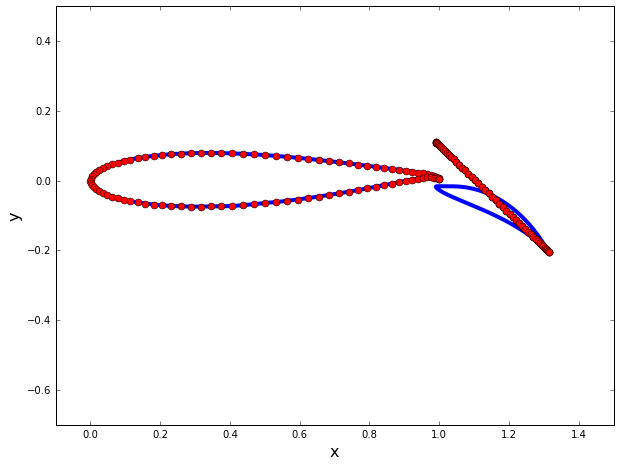

In [156]:
# and plot this
width = 10
pyplot.figure(figsize=(width, width))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(xmain, ymain, xflap, yflap, color='b', linestyle='-', linewidth=4)
pyplot.plot(numpy.append([panel.xa for panel in mainpanels], mainpanels[0].xa),
            numpy.append([panel.ya for panel in mainpanels], mainpanels[0].ya),
            numpy.append([panel.xa for panel in flappanels], flappanels[0].xa),
            numpy.append([panel.ya for panel in flappanels], flappanels[0].ya),
            linestyle='-', linewidth=0, marker='o', markersize=7, color='r')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz);

In [157]:
mainA_source = source_contribution_normal(mainpanels)
mainB_vortex = vortex_contribution_normal(mainpanels)
flapA_source = source_contribution_normal(flappanels)
flapB_vortex = vortex_contribution_normal(flappanels)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/gil/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [11]:
mainA = build_singularity_matrix(mainA_source, mainB_vortex)
mainb = build_freestream_rhs(mainpanels, freestream)

flapA = build_singularity_matrix(flapA_source, flapB_vortex)
flapb = build_freestream_rhs(flappanels, freestream)

In [12]:
# MAIN
# solve for singularity strengths
mainstrengths = numpy.linalg.solve(mainA, mainb)

# store source strength on each panel
for i , panel in enumerate(mainpanels):
    panel.sigma = mainstrengths[i]
    
# store circulation density
maingamma = mainstrengths[-1]

# FLAP
# solve for singularity strengths
flapstrengths = numpy.linalg.solve(flapA, flapb)

# store source strength on each panel
for i , panel in enumerate(flappanels):
    panel.sigma = flapstrengths[i]
    
# store circulation density
flapgamma = flapstrengths[-1]

In [13]:
# tangential velocity at each panel center
compute_tangential_velocity(mainpanels, freestream, maingamma, mainA_source, mainB_vortex)
compute_tangential_velocity(flappanels, freestream, flapgamma, flapA_source, flapB_vortex)

# surface pressure coefficient
compute_pressure_coefficient(mainpanels, freestream)
compute_pressure_coefficient(flappanels, freestream)

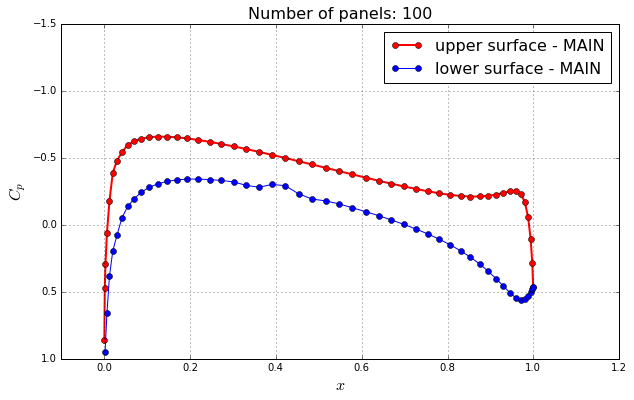

In [14]:
# plot main
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in mainpanels if panel.loc == 'upper'],
            [panel.cp for panel in mainpanels if panel.loc == 'upper'],
            label='upper surface - MAIN',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
pyplot.plot([panel.xc for panel in mainpanels if panel.loc == 'lower'],
            [panel.cp for panel in mainpanels if panel.loc == 'lower'],
            label= 'lower surface - MAIN',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(xa, 1.2)
pyplot.ylim(1, -1.5)
pyplot.title('Number of panels: {}'.format(mainpanels.size), fontsize=16);

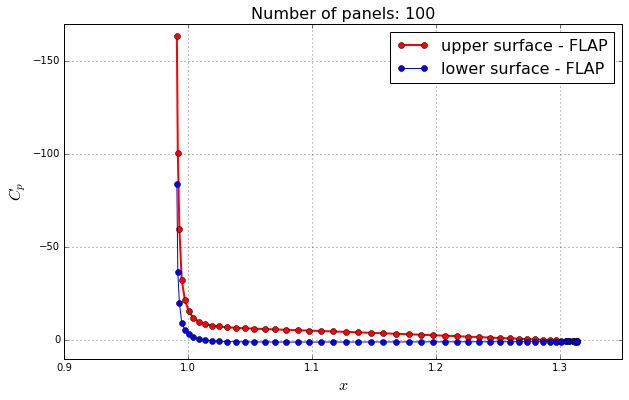

In [20]:
# plot flap
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot([panel.xc for panel in flappanels if panel.loc == 'upper'],
            [panel.cp for panel in flappanels if panel.loc == 'upper'],
            label='upper surface - FLAP',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
pyplot.plot([panel.xc for panel in flappanels if panel.loc == 'lower'],
            [panel.cp for panel in flappanels if panel.loc == 'lower'],
            label= 'lower surface - FLAP',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(0.9, 1.35)
pyplot.ylim(10, -170)
pyplot.title('Number of panels: {}'.format(flappanels.size), fontsize=16);

In [158]:
# Question 1
mainpanels[2].cp

0.0